In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Exploration

In [2]:
df = pd.read_csv('RTA Dataset.csv')

In [3]:
df

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior high school                Employee              1-2yr   
3      Junior high school                Employee             5-10yr   
4      Junior high school                Employee              2-5yr   
...                   ...                     ...                ...   
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

           Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
0               Automobile            Owner              Above 10yr  ...   
1      Public (> 45 seats)            Owner                 5-10yrs  ...   
2          Lorry (41?100Q)            Owner                     NaN  ...   
3      Public (> 45 seats)     Governmental                     NaN  ...   
4                      NaN            Owner                 5-10yrs  ...   
...                    ...              ...                     ...  ...   
12311       Lorry (11?40Q)            Owner                     NaN  ...   
12312           Automobile            Owner                     NaN  ...   
12313                Bajaj            Owner                  2-5yrs  ...   
12314      Lorry (41?100Q)            Owner                  2-5yrs  ...   
12315                Other            Owner                  2-5yrs  ...   

      Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
0       Going straight               na              na                   na   
1       Going straight               na              na                   na   
2       Going straight  Driver or rider            Male                31-50   
3       Going straight       Pedestrian          Female                18-30   
4       Going straight               na              na                   na   
...                ...              ...             ...                  ...   
12311   Going straight               na              na                   na   
12312            Other               na              na                   na   
12313            Other  Driver or rider            Male                31-50   
12314            Other               na              na                   na   
12315         Stopping       Pedestrian          Female                    5   

      Casualty_severity Work_of_casuality Fitness_of_casuality  \
0                    na               NaN                  NaN   
1                    na               NaN                  NaN   
2                     3            Driver                  NaN   
3                     3            Driver               Normal   
4                    na               NaN                  NaN   
...                 ...               ...                  ...   
12311                na            Driver

In [4]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
df.loc[50:60,['Road_surface_conditions']]

Road_surface_conditions
50                     Dry
51                     Dry
52                     Dry
53                     Dry
54                     Dry
55                     Dry
56                     Dry
57                     Dry
58             Wet or damp
59             Wet or damp
60                     Dry

In [7]:
df.describe()

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

In [8]:
df.describe(include=['O'])

Time Day_of_week Age_band_of_driver Sex_of_driver  \
count      12316       12316              12316         12316   
unique      1074           7                  5             3   
top     15:30:00      Friday              18-30          Male   
freq         120        2041               4271         11437   

         Educational_level Vehicle_driver_relation Driving_experience  \
count                11575                   11737              11487   
unique                   7                       4                  7   
top     Junior high school                Employee             5-10yr   
freq                  7619                    9627               3363   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
count            11366            11834                    8388  ...   
unique              17                4                       6  ...   
top         Automobile            Owner                 Unknown  ...   
freq              3205            10459                    2883  ...   

       Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
count             12008            12316           12316                12316   
unique               13                4               3                    6   
top      Going straight  Driver or rider            Male                   na   
freq               8158             4944            5253                 4443   

       Casualty_severity Work_of_casuality Fitness_of_casuality  \
count              12316              9118                 9681   
unique                 4                 7                    5   
top                    3            Driver               Normal   
freq                7076              5903                 9608   

       Pedestrian_movement Cause_of_accident Accident_severity  
count                12316             12316             12316  
unique                   9                20                 3  
top       Not a Pedestrian     No distancing     Slight Injury  
freq                 11390              2263             10415  

[4 rows x 30 columns]

In [9]:
df.duplicated()
df.duplicated().sum()

0

In [10]:
df.groupby('Accident_severity').size()

Accident_severity
Fatal injury        158
Serious Injury     1743
Slight Injury     10415
dtype: int64

In [11]:
df['Cause_of_accident'].value_counts()

Cause_of_accident
No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: count, dtype: int64

In [12]:
df.isnull()

Time  Day_of_week  Age_band_of_driver  Sex_of_driver  \
0      False        False               False          False   
1      False        False               False          False   
2      False        False               False          False   
3      False        False               False          False   
4      False        False               False          False   
...      ...          ...                 ...            ...   
12311  False        False               False          False   
12312  False        False               False          False   
12313  False        False               False          False   
12314  False        False               False          False   
12315  False        False               False          False   

       Educational_level  Vehicle_driver_relation  Driving_experience  \
0                  False                    False               False   
1                  False                    False               False   
2                  False                    False               False   
3                  False                    False               False   
4                  False                    False               False   
...                  ...                      ...                 ...   
12311               True                    False               False   
12312              False                    False               False   
12313              False                    False               False   
12314              False                    False               False   
12315              False                    False               False   

       Type_of_vehicle  Owner_of_vehicle  Service_year_of_vehicle  ...  \
0                False             False                    False  ...   
1                False             False                    False  ...   
2                False             False                     True  ...   
3                False             False                     True  ...   
4                 True             False                    False  ...   
...                ...               ...                      ...  ...   
12311            False             False                     True  ...   
12312            False             False                     True  ...   
12313            False             False                    False  ...   
12314            False             False                    False  ...   
12315            False             False                    False  ...   

       Vehicle_movement  Casualty_class  Sex_of_casualty  \
0                 False           False            False   
1                 False           False            False   
2                 False           False            False   
3                 False           False            False   
4                 False           False            False   
...                 ...             ...              ...   
12311             False           False            False   
12312             False           False            False   
12313             False           False            False   
12314             False           False            False   
12315             False           False            False   

       Age_band_of_casualty  Casualty_severity  Work_of_casuality  \
0                     False              False               True   
1                     False              False               True   
2                     False              False              False   
3                     False              False              False   
4                     False              False               True   
...                     ...                ...                ...   
12311                 False              False              False   
12312                 False              False              False   
12313                 False              False              False   
12314                 False              False              Fa

In [13]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [14]:
#dropping columns which has more than 2500 missing values and Time column
df.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Time'], axis = 1, inplace = True)
df.head()

Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0      Monday              18-30          Male   Above high school   
1      Monday              31-50          Male  Junior high school   
2      Monday              18-30          Male  Junior high school   
3      Sunday              18-30          Male  Junior high school   
4      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Area_accident_occured   Lanes_or_Medians  ...  \
0            Owner     Residential areas                NaN  ...   
1            Owner          Office areas  Undivided Two way  ...   
2            Owner    Recreational areas              other  ...   
3     Governmental          Office areas              other  ...   
4            Owner      Industrial areas              other  ...   

  Number_of_vehicles_involved Number_of_casualties Vehicle_movement  \
0                           2                    2   Going straight   
1                           2                    2   Going straight   
2                           2                    2   Going straight   
3                           2                    2   Going straight   
4                           2                    2   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

   Pedestrian_movement           Cause_of_accident Accident_severity  
0     Not a Pedestrian             Moving Backward     Slight Injury  
1     Not a Pedestrian                  Overtaking     Slight Injury  
2     Not a Pedestrian   Changing lane to the left    Serious Injury  
3     Not a Pedestrian  Changing lane to the right     Slight Injury  
4     Not a Pedestrian                  Overtaking     Slight Injury  

[5 rows x 27 columns]

In [15]:
#storing categorical column names to a new variable
categorical=[i for i in df.columns if df[i].dtype=='O']
print('The categorical variables are',categorical)

The categorical variables are ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [16]:
#for categorical values we can replace the null values with the Mode of it
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [17]:
df.isnull().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [ ]:

#data = data.drop('Vehicle_driver_relation', axis=1)

# Data Visualization

<Axes: xlabel='Number_of_casualties', ylabel='Number_of_vehicles_involved'>

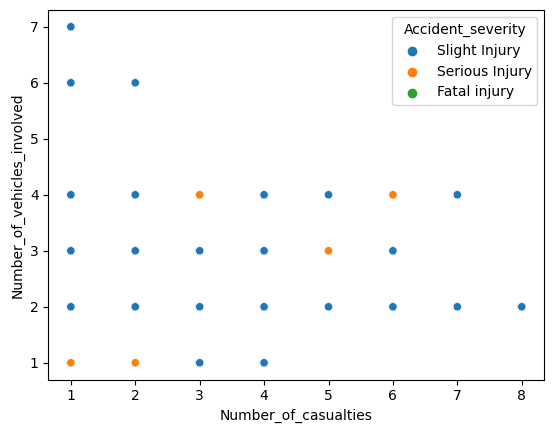

In [18]:
#plotting relationship between Number_of_casualties and Number_of_vehicles_involved
sns.scatterplot(x=df['Number_of_casualties'], y=df['Number_of_vehicles_involved'], hue=df['Accident_severity'])

#Observation

There is no visible correlation between Number_of_casualties and Number_of_vehicles_involved columns


In [22]:
#storing numerical column names to a variable
numerical=[i for i in df.columns if df[i].dtype!='O']
print('The numerica variables are',numerical)

The numerica variables are ['Number_of_vehicles_involved', 'Number_of_casualties']


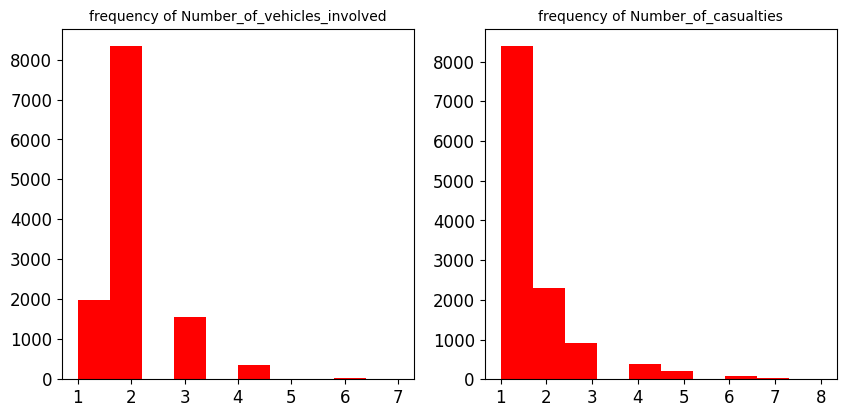

In [23]:
#distribution for numerical columns
plt.figure(figsize=(10,10))
plotnumber = 1
for i in numerical:
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(2,2,plotnumber)
        plt.hist(df[i],color='red')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title('frequency of '+i, fontsize=10)
    plotnumber +=1


Observation

Most accidents are occured when 2 vehicles are involved and 1 casuality is happend mostly in the accidents.

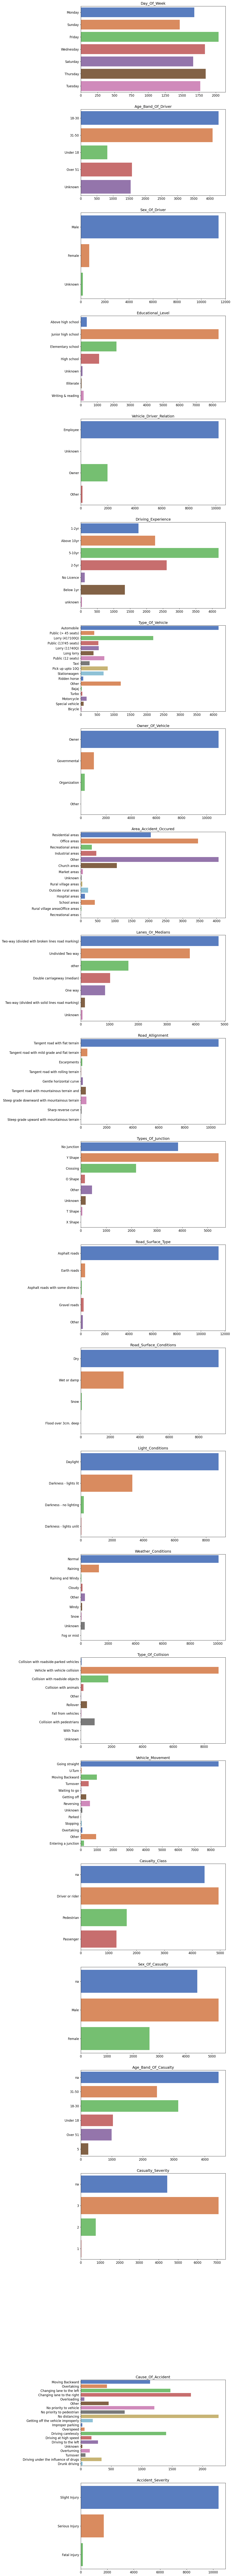

In [25]:
#count plot for categorical values
plt.figure(figsize=(10,200))
plotnumber = 1

for col in categorical:
    if plotnumber <= df.shape[1] and col!='Pedestrian_movement':
        ax1 = plt.subplot(28,1,plotnumber)
        sns.countplot(data=df, y=col, palette='muted')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1

Handling Categorical values

In [27]:
df.dtypes

Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_severity              object
Pedestrian_movement            object
Cause_of_accident              object
Accident_sev

Since there are so many categorical values, we need to use feature selection We need to perform label encoding before applying chi 2 analysis


In [28]:
#importing label encoing module
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#creating a new data frame from performing the chi2 analysis
df1=pd.DataFrame()

#adding all the categorical columns except the output to new data frame
for i in categorical:
    if i!= 'Accident_severity':
        df1[i]=le.fit_transform(df[i])

In [29]:
#confirming the data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Day_of_week              12316 non-null  int32
 1   Age_band_of_driver       12316 non-null  int32
 2   Sex_of_driver            12316 non-null  int32
 3   Educational_level        12316 non-null  int32
 4   Vehicle_driver_relation  12316 non-null  int32
 5   Driving_experience       12316 non-null  int32
 6   Type_of_vehicle          12316 non-null  int32
 7   Owner_of_vehicle         12316 non-null  int32
 8   Area_accident_occured    12316 non-null  int32
 9   Lanes_or_Medians         12316 non-null  int32
 10  Road_allignment          12316 non-null  int32
 11  Types_of_Junction        12316 non-null  int32
 12  Road_surface_type        12316 non-null  int32
 13  Road_surface_conditions  12316 non-null  int32
 14  Light_conditions         12316 non-null  int32
 15  We

In [31]:
df1.corr()

Day_of_week  Age_band_of_driver  Sex_of_driver  \
Day_of_week                 1.000000            0.019993       0.009986   
Age_band_of_driver          0.019993            1.000000      -0.351878   
Sex_of_driver               0.009986           -0.351878       1.000000   
Educational_level          -0.004517            0.013613       0.004967   
Vehicle_driver_relation     0.003303           -0.005841       0.011035   
Driving_experience         -0.010062           -0.013407       0.009855   
Type_of_vehicle            -0.002417            0.004830      -0.003757   
Owner_of_vehicle            0.001417            0.005405      -0.009489   
Area_accident_occured       0.003281            0.011472      -0.000274   
Lanes_or_Medians           -0.009320            0.008176      -0.012529   
Road_allignment            -0.008505            0.000486      -0.002238   
Types_of_Junction          -0.026669           -0.028025       0.004920   
Road_surface_type           0.009832            0.001058       0.003112   
Road_surface_conditions    -0.008294           -0.032533       0.031601   
Light_conditions            0.036280           -0.007766       0.037390   
Weather_conditions         -0.003248            0.025482      -0.006179   
Type_of_collision           0.003026            0.000496      -0.011513   
Vehicle_movement           -0.027643           -0.006562       0.007058   
Casualty_class              0.006661            0.005386       0.003335   
Sex_of_casualty             0.001461            0.011358      -0.006046   
Age_band_of_casualty       -0.003642            0.000043       0.014191   
Casualty_severity           0.001512            0.003565       0.002474   
Pedestrian_movement         0.000250            0.000372       0.006981   
Cause_of_accident           0.010516           -0.000703      -0.000598   

                         Educational_level  Vehicle_driver_relation  \
Day_of_week                      -0.004517                 0.003303   
Age_band_of_driver                0.013613                -0.005841   
Sex_of_driver                     0.004967                 0.011035   
Educational_level                 1.000000                -0.076866   
Vehicle_driver_relation          -0.076866                 1.000000   
Driving_experience                0.057625                 0.016686   
Type_of_vehicle                   0.005447                -0.003481   
Owner_of_vehicle                 -0.012486                 0.014860   
Area_accident_occured            -0.006854                 0.021997   
Lanes_or_Medians                 -0.002756                 0.004656   
Road_allignment                  -0.010213                -0.013660   
Types_of_Junction                 0.014798                -0.011548   
Road_surface_type                 0.014345                -0.001312   
Road_surface_conditions           0.008614                 0.004257   
Light_conditions                 -0.000290                 0.001351   
Weather_conditions               -0.000242                -0.015357   
Type_of_collision                -0.009477                -0.005568   
Vehicle_movement                  0.004248                 0.005631   
Casualty_class                    0.005382                -0.002817   
Sex_of_casualty                   0.007483                -0.000664   
Age_band_of_casualty              0.008226                 0.008115   
Casualty_severity                 0.004950                -0.003230   
Pedestrian_movement               0.000177                 0.015803   
Cause_of_accident                -0.000451                -0.010753   

                         Driving_experience  Type_of_vehicle  \
Day_of_week                       -0.010062        -0.002417   
Age_band_of_driver                -0.013407         0.004830   
Sex_of_driver                      0.009855        -0.003757   
Educational_level                  0.057625         0.005447   
Vehicle_driver_relation            0.016686        -0

<Axes: >

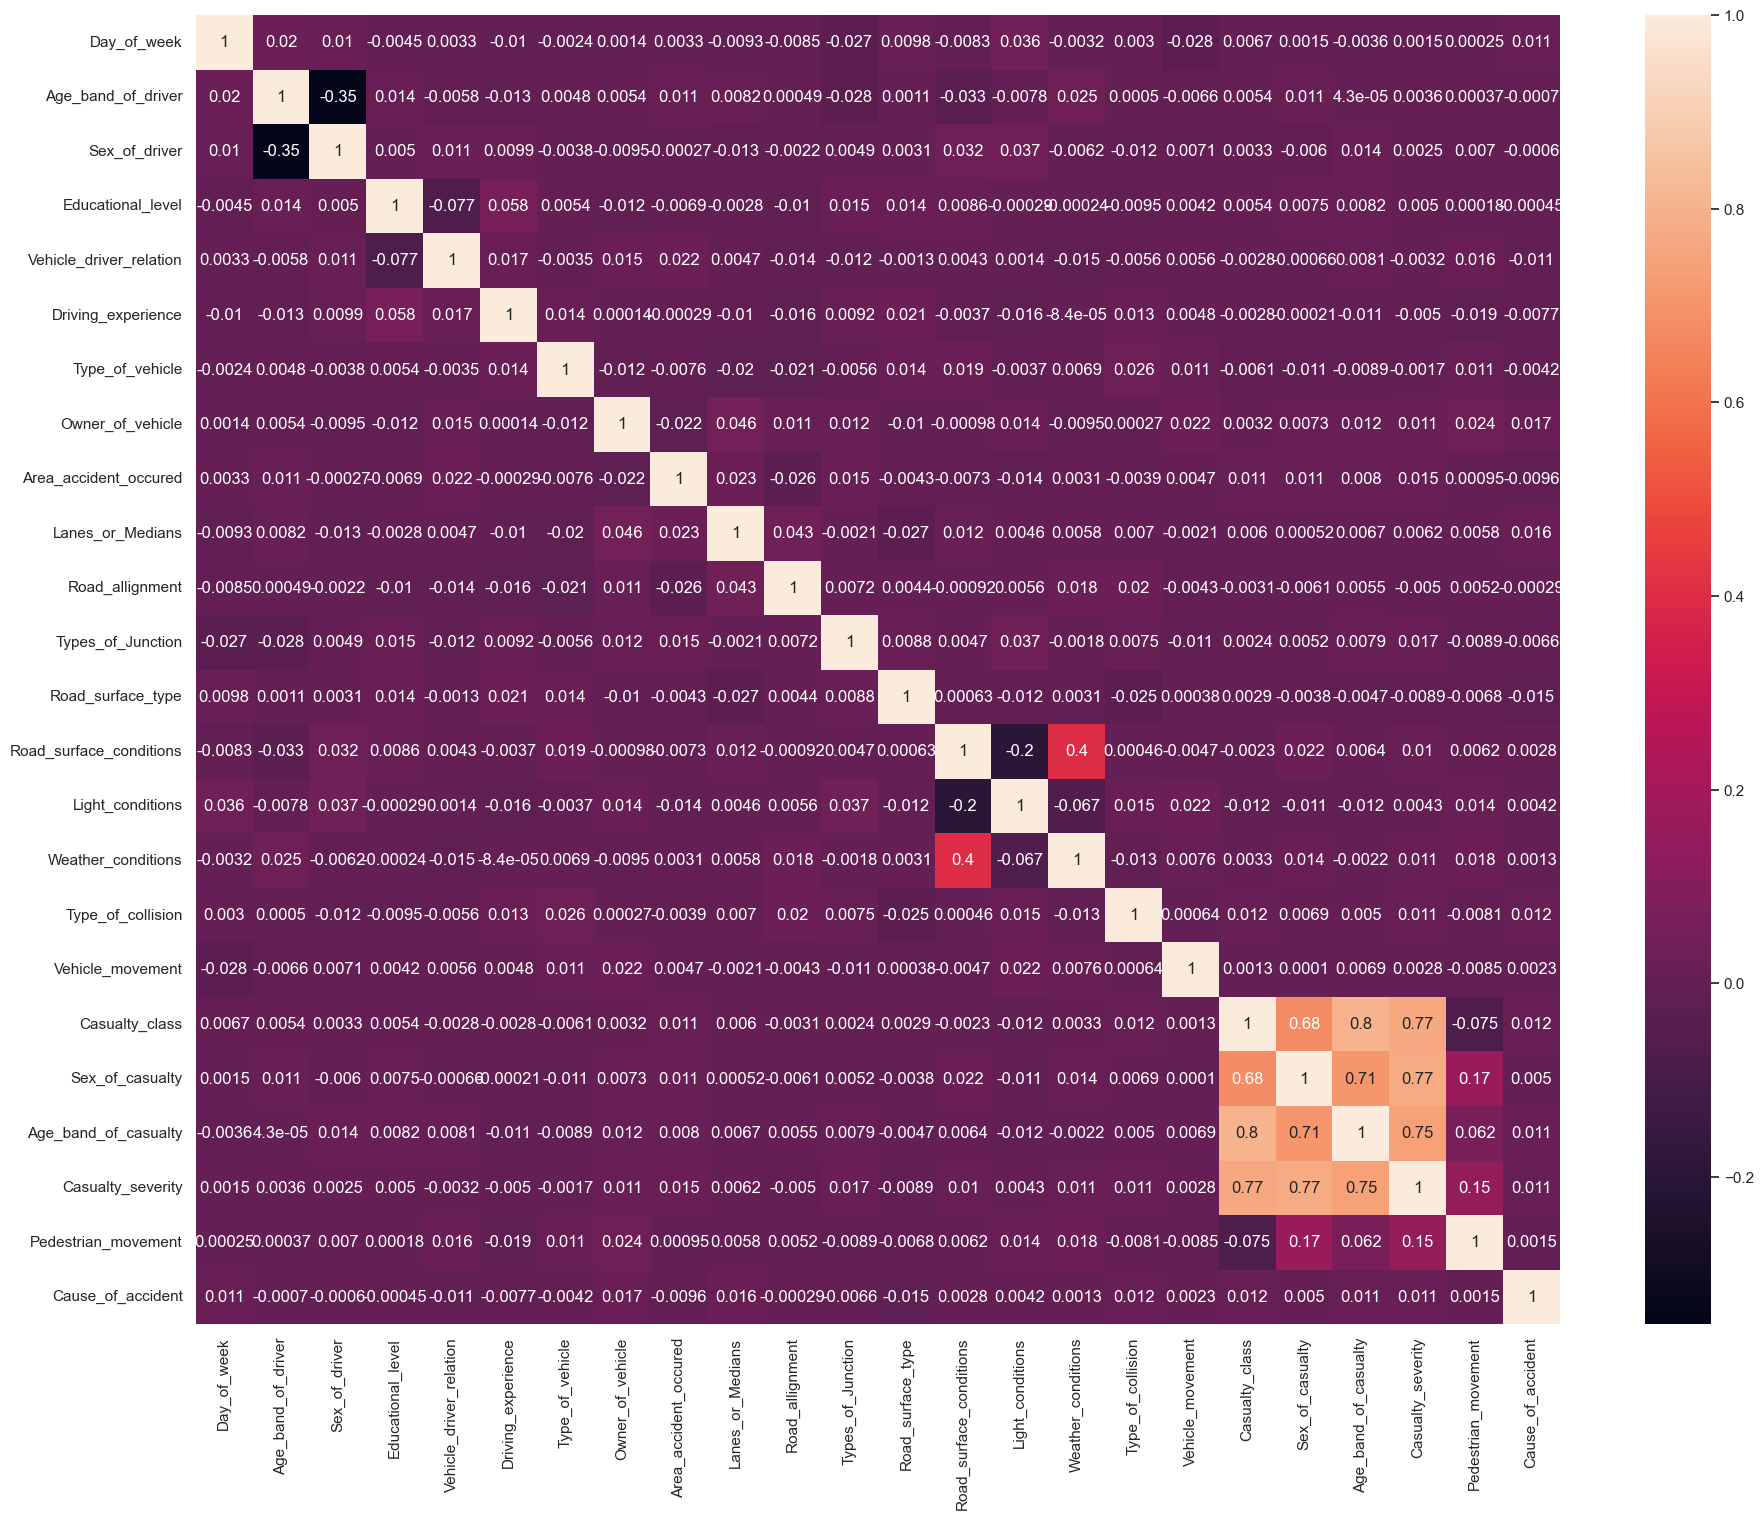

In [33]:
plt.figure(figsize=(22,17))
sns.set(font_scale=1)
sns.heatmap(df1.corr(), annot=True)

In [ ]:
data.Age_band_of_driver.hist()

In [ ]:
data.Sex_of_driver.unique()  

In [ ]:
data['Sex_of_driver'].describe()

In [ ]:
gender_counts = data['Sex_of_driver'].value_counts()
gender_counts

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Number of drivers in gender')
plt.ylabel('Number of drivers')
plt.xlabel('sex of driver')
plt.show()

In [ ]:
data = data[data['Sex_of_driver'] != 'Unknown']

In [ ]:
counts = data['Sex_of_driver'].value_counts()
counts

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.title('Number of drivers in gender')
plt.ylabel('Number of drivers')
plt.xlabel('sex of driver')
plt.show()

In [ ]:
data.drop(columns = ['Work_of_casuality', 'Fitness_of_casuality','Day_of_week',
                     'Casualty_severity','Time','Sex_of_driver','Educational_level','Defect_of_vehicle',
                     'Owner_of_vehicle','Service_year_of_vehicle', 'Road_surface_type','Sex_of_casualty'], inplace=True)

In [ ]:
data

In [ ]:
data.Number_of_casualties.hist()

In [ ]:
data.Road_surface_conditions.value_counts().plot(kind='bar')
#data.Road_surface_conditions.plot(kind='bar')

In [ ]:
plt.figure(figsize=(4,4))
data.Number_of_casualties.value_counts().plot(kind='pie',autopct='%1.1f%%')



In [ ]:
data.Road_surface_conditions.value_counts().plot(kind='pie',figsize=(4, 4))